##importing_library

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2 
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
import glob
import glob as gb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import  metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
%matplotlib inline


### functions_to plot the predictions

In [2]:
class_names = sorted(os.listdir('/content/drive/MyDrive/face_dataset/test/'))

In [3]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="black")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('blue')
  thisplot[true_label].set_color('red')

In [4]:
def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

## loading _train_test and preprocessing

##Resizing_train_test

In [5]:
size=48
d=sorted(os.listdir('/content/drive/MyDrive/face_dataset/train'))
l='/content/drive/MyDrive/face_dataset/train/'
xt_img=[]
yt_img=[]
for ds in d:
  m=ds.split("\\")[-1]
  print(m)


  for img in glob.glob(os.path.join(l+ds,"*.jpg")):
    print(img)
    im=cv2.imread(img,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(size,size))
    xt_img.append(im)
    yt_img.append(m)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/face_dataset/train/sad/Training_21398218.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_4658201.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_65701260.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_58108398.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_29696039.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_2059327.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_33400452.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_10662933.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_41497076.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_45457453.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_62890830.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_62559658.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_26185524.jpg
/content/drive/MyDrive/face_dataset/train/sad/Training_30967237.jpg

In [6]:
size=48
d=sorted(os.listdir('/content/drive/MyDrive/face_dataset/test/'))
l='/content/drive/MyDrive/face_dataset/test/'
xte_img=[]
yte_img=[]
for ds in d:
  m=ds.split("\\")[-1]
  print(m)


  for img in glob.glob(os.path.join(l+ds,"*.jpg")):
    print(img)
    im=cv2.imread(img,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(size,size))
    xte_img.append(im)
    yte_img.append(m)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_81973303.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_88480035.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_87455722.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_84405194.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_94843283.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_94168367.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_92587611.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_89192537.jpg
/content/drive/MyDrive/face_dataset/test/happy/PublicTest_10130075.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_90330103.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_93786622.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_91362293.jpg
/content/drive/MyDrive/face_dataset/test/happy/PrivateTest_92259699.jpg
/content/drive

##image_to_array

In [7]:
xt_img=np.array(xt_img)
yt_img=np.array(yt_img)
xte_img=np.array(xte_img)
yte_img=np.array(yte_img)

In [8]:
print(xt_img.shape)
print(xte_img.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)


##Encoding_mylabel

In [9]:
le=preprocessing.LabelEncoder()
le.fit(yt_img)
y=le.transform(yt_img)
le.fit(yte_img)
ye=le.transform(yte_img)

##Exploring _dataset

In [10]:
import plotly.express as px
fig = px.pie(names=os.listdir('/content/drive/MyDrive/face_dataset/train/'), values=[len(os.listdir( '/content/drive/MyDrive/face_dataset/train/'+ name)) for name in os.listdir('/content/drive/MyDrive/face_dataset/train/')], title="Training Class Distribution")
fig.update_layout({'title':{'x':0.48}})

fig.show()

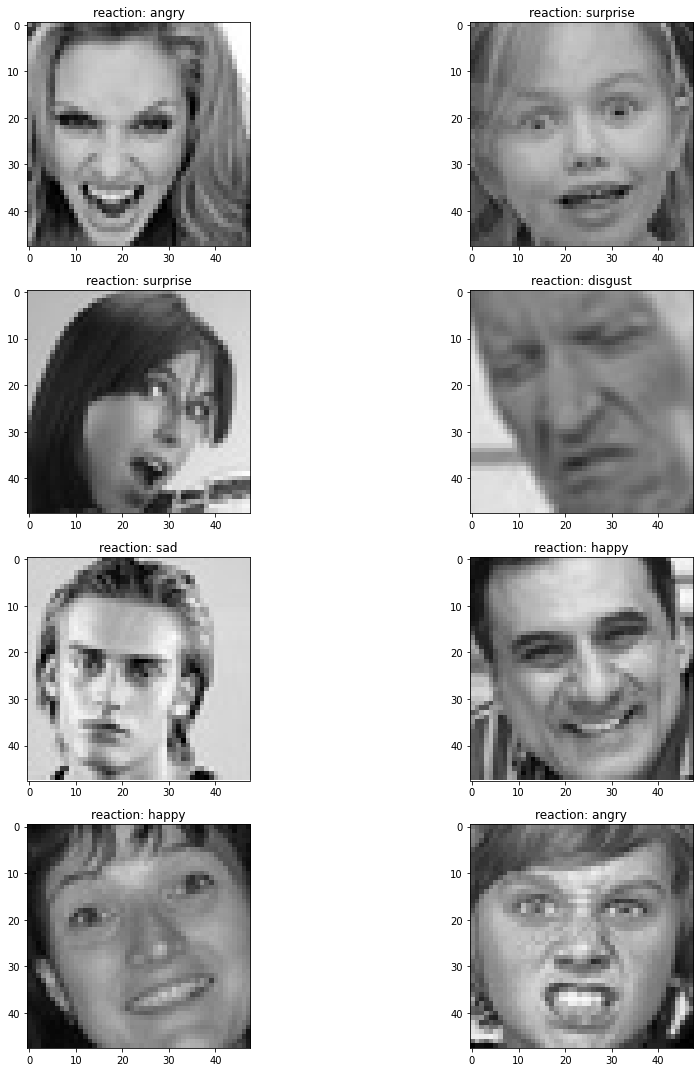

In [11]:
import random as rn
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range(2):
        l=rn.randint(0,len(xt_img)-1)
        ax[i,j].imshow(xt_img[l],cmap='gray')
        ax[i,j].set_title('reaction: '+yt_img[l])
plt.tight_layout()   

## preparing_train_test to model

In [12]:
x_train,y_train,x_test,y_test=xt_img,y,xte_img,ye  

##Rescaling_images

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
print(x_train.shape)
print(x_test.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)


##image to reshape and expanding to train andd test

In [16]:
image_features=x_train
image_features=np.expand_dims(x_train,axis=0)
image_features.shape
print(image_features.shape)
X=np.reshape(image_features,(x_train.shape[0],-1))
print(X.shape)

(1, 28709, 48, 48, 3)
(28709, 6912)


In [17]:
test_features=x_test
test_features=np.expand_dims(test_features,axis=0)
print(test_features.shape)
Xp=np.reshape(test_features,(x_test.shape[0],-1))
print(Xp.shape)

(1, 7178, 48, 48, 3)
(7178, 6912)


#ANN MODEL

In [135]:
mo = keras.models.Sequential()
mo.add(keras.layers.Flatten(input_shape=(6912,)))
mo.add(keras.layers.Dense(512, activation='relu'))
mo.add(keras.layers.Dense(256, activation='relu'))
mo.add(keras.layers.Dense(128, activation='relu'))
mo.add(keras.layers.Dense(128, activation='relu'))
mo.add(keras.layers.Dense(7, activation='softmax'))

##compiling

In [111]:
mo.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Fitting

In [112]:

history=mo.fit(X, y_train, epochs=80,batch_size=256)

Epoch 1/80
113/113 [==============================] - 1s 7ms/step - loss: 1.8895 - accuracy: 0.2443
Epoch 2/80
113/113 [==============================] - 1s 6ms/step - loss: 1.7421 - accuracy: 0.3082
Epoch 3/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6984 - accuracy: 0.3317
Epoch 4/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6713 - accuracy: 0.3456
Epoch 5/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6587 - accuracy: 0.3520
Epoch 6/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6474 - accuracy: 0.3564
Epoch 7/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6297 - accuracy: 0.3610
Epoch 8/80
113/113 [==============================] - 1s 6ms/step - loss: 1.6108 - accuracy: 0.3714
Epoch 9/80
113/113 [==============================] - 1s 6ms/step - loss: 1.5964 - accuracy: 0.3753
Epoch 10/80
113/113 [==============================] - 1s 6ms/step - loss: 1.5888 - accuracy: 0.3786

#show fig train_accuracy_loss

In [157]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
train_acc = history.history['accuracy'] 
epoch = range(1, 81)

loss = pd.DataFrame({'train_loss' : train_loss, 'train_acc' :train_acc})

px.line(data_frame = loss, x = epoch, y = ['train_acc', 'train_loss'], title = 'Training accuracy and Loss',
        template = 'plotly_dark')

<Figure size 864x432 with 0 Axes>

#testing_accurcy

In [114]:
loss,acc=mo.evaluate(Xp, y_test,batch_size=256)

29/29 [==============================] - 0s 6ms/step - loss: 2.5071 - accuracy: 0.4043


##predictions

In [115]:

predictions = mo.predict(Xp)
print(predictions)

225/225 [==============================] - 0s 2ms/step
[[1.0502604e-02 4.5520152e-05 4.9334446e-01 ... 1.0321339e-01
  9.5876113e-02 1.1464021e-01]
 [3.4905329e-01 5.0917296e-03 4.3776360e-01 ... 7.7831998e-02
  2.8152840e-02 1.3795205e-03]
 [1.3000823e-02 1.5408146e-04 5.2339458e-01 ... 3.2270226e-01
  9.1502994e-02 2.8902911e-02]
 ...
 [1.0677909e-05 3.7000672e-10 1.4056971e-05 ... 7.4636534e-07
  2.7648500e-06 9.9994349e-01]
 [4.8561701e-06 5.0793788e-12 3.4678360e-03 ... 2.5408528e-07
  5.5848993e-08 9.9650478e-01]
 [2.7358041e-05 1.0172246e-05 1.7029920e-04 ... 9.2845000e-03
  4.8100417e-05 6.4463370e-02]]


##Saving_model

In [116]:
mo.save("project_model.h5")

##making_report

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.34      0.21      0.26       958
           1       0.39      0.29      0.33       111
           2       0.28      0.38      0.32      1024
           3       0.63      0.47      0.54      1774
           4       0.35      0.45      0.39      1233
           5       0.37      0.29      0.33      1247
           6       0.43      0.64      0.51       831

    accuracy                           0.40      7178
   macro avg       0.40      0.39      0.38      7178
weighted avg       0.42      0.40      0.40      7178



##confusion matrix TP-TN

accuracy of the model:  0.4042908847332001


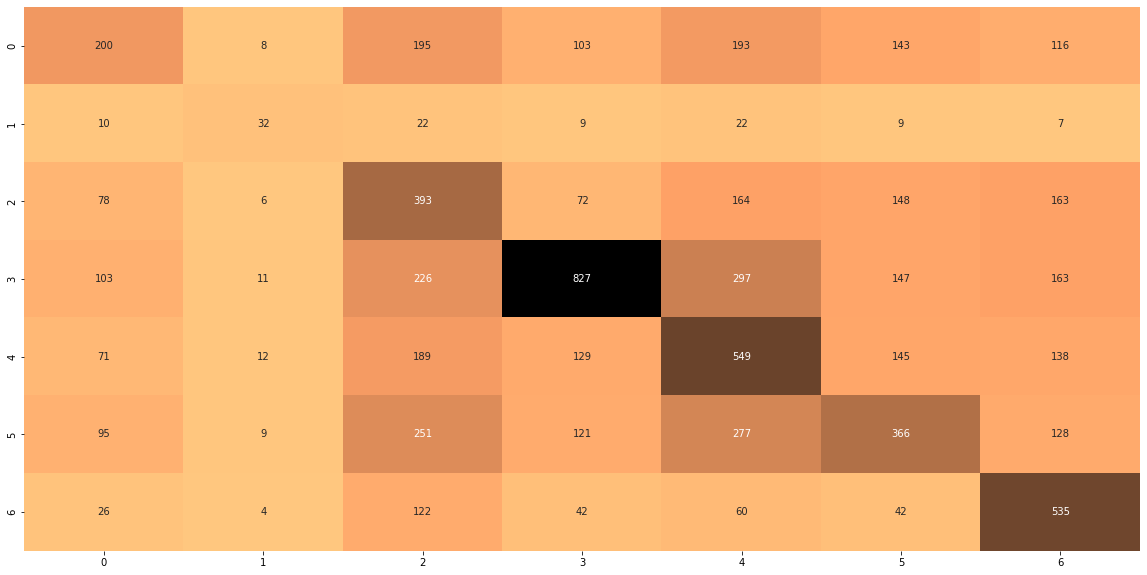

In [184]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(figsize=(20,10))
cm = confusion_matrix(y_test, np.argmax(predictions, axis=1))
sns.heatmap(cm,annot=True,cmap="copper_r",fmt="d",cbar=False,ax=ax)
print('accuracy of the model: ',acc)

##ROC-CURVE,FP-TP AND AUC

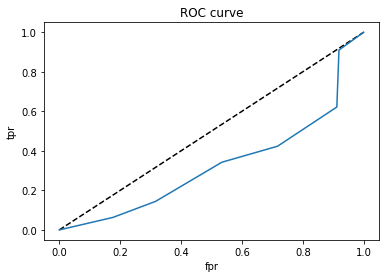

In [119]:
fpr, tpr, thresholds = roc_curve(y_test,np.argmax(predictions, axis=1),pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [120]:

roc_auc_score(y_test,predictions,multi_class='ovo')

0.7459043541546209

##Showing predictions to some examples and using plotin functions

['happy']


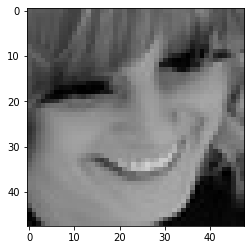

In [125]:
 i = np.random.randint(0,x_test.shape[0]-1)
import numpy as np
mo=np.argmax(predictions[i])
 mo=le.inverse_transform([mo])
print(mo)
plt.imshow(x_test[i],cmap=plt.cm.binary)
plt.show()

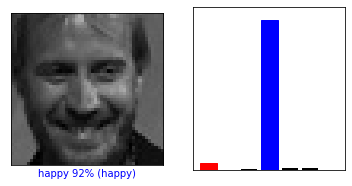

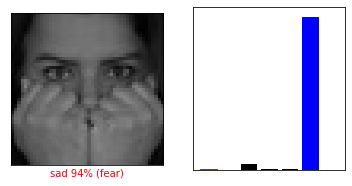

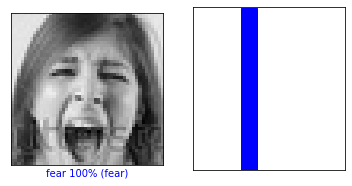

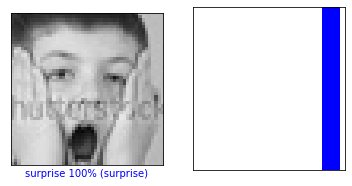

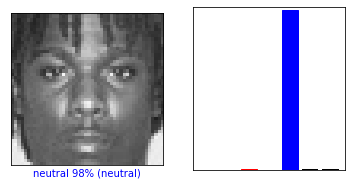

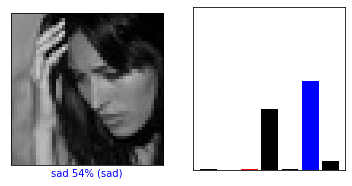

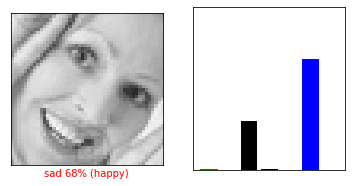

In [137]:
for i in range(7):
  i = np.random.randint(0,x_test.shape[0]-1)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, y_test, xte_img)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  y)
  plt.show()

#Loading model-and use it again

In [185]:
new_model=keras.models.load_model("project_model.h5")
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 6912)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               3539456   
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 7)                 903       
                                                                 
Total params: 3,721,095
Trainable params: 3,721,095
No

In [128]:
import cv2
img='/content/drive/MyDrive/bahga.jpg'
im=cv2.imread(img,cv2.IMREAD_COLOR)
im=cv2.resize(im,(48,48))

In [129]:
im=np.array(im)
im=im/255.0


In [130]:
test_fea=im
test_fea=np.expand_dims(test_fea,axis=0)
print(test_fea.shape)
c=np.reshape(test_fea,(1,-1))
print(c.shape)

(1, 48, 48, 3)
(1, 6912)


In [167]:
p=new_model.predict(c)

1/1 [==============================] - 0s 62ms/step


In [168]:

p

array([[0.00187332, 0.02092485, 0.81610984, 0.0050268 , 0.05885957,
        0.02243506, 0.07477063]], dtype=float32)

In [175]:
im2='/content/drive/MyDrive/271114946_961165611490223_5372677527991416200_n.jpg'
imw2=cv2.imread(im2,cv2.IMREAD_COLOR)
imw2=cv2.resize(imw2,(48,48))

In [176]:
imw2=np.array(imw2)
imw2=imw2/255.0
test_fea=imw2
test_fea=np.expand_dims(test_fea,axis=0)
print(test_fea.shape)
c2=np.reshape(test_fea,(1,-1))

(1, 48, 48, 3)


In [178]:
p2=new_model.predict(c2)

1/1 [==============================] - 0s 106ms/step


In [179]:
p2

array([[0.00187332, 0.02092485, 0.81610984, 0.0050268 , 0.05885957,
        0.02243506, 0.07477063]], dtype=float32)